# 4 Common Stock Indicators Trend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2014-01-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
2014-01-08,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [3]:
import talib as ta

## Simple Moving Averages

Moving averages is a "smooth" price data that is created in a single flowing line. Therefore, the line represents the average price over a period of time. Traders use the moving average to decides to determined the time frame in which he or she trades. On the other hand, investors use moving averages for long-term trend and they use the 200-day, 100-day and 50-day simple moving average.

In [4]:
sma = ta.SMA(df['Adj Close'])
sma

Date
2014-01-02           NaN
2014-01-03           NaN
2014-01-06           NaN
2014-01-07           NaN
2014-01-08           NaN
2014-01-09           NaN
2014-01-10           NaN
2014-01-13           NaN
2014-01-14           NaN
2014-01-15           NaN
2014-01-16           NaN
2014-01-17           NaN
2014-01-21           NaN
2014-01-22           NaN
2014-01-23           NaN
2014-01-24           NaN
2014-01-27           NaN
2014-01-28           NaN
2014-01-29           NaN
2014-01-30           NaN
2014-01-31           NaN
2014-02-03           NaN
2014-02-04           NaN
2014-02-05           NaN
2014-02-06           NaN
2014-02-07           NaN
2014-02-10           NaN
2014-02-11           NaN
2014-02-12           NaN
2014-02-13     65.071525
                 ...    
2018-11-15    211.337680
2018-11-16    210.342610
2018-11-19    209.110164
2018-11-20    207.480448
2018-11-21    206.191718
2018-11-23    204.817135
2018-11-26    203.266528
2018-11-27    201.860417
2018-11-28    200.51

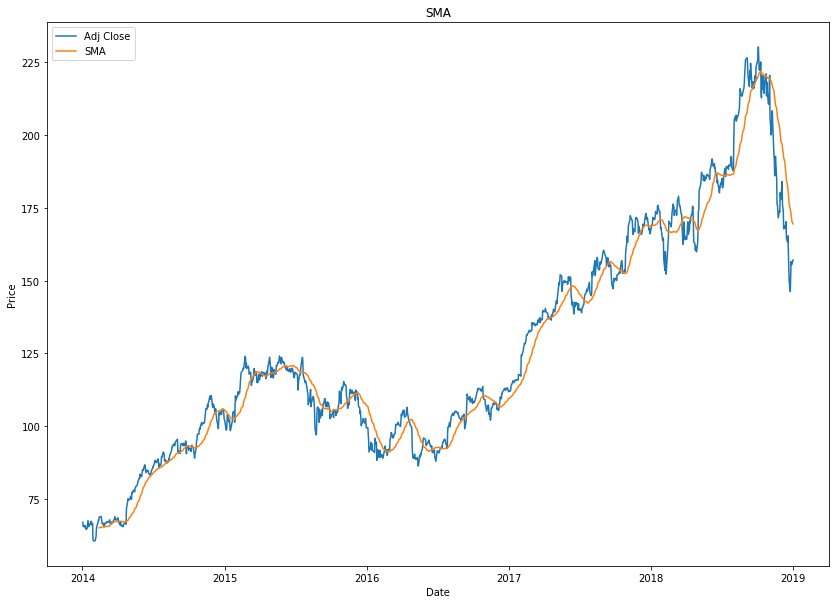

In [5]:
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.plot(sma.dropna(), label='SMA')
plt.legend(loc='best')
plt.title('SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## RSI (Relative Strength Index) 

RSI is similar to oscillator because its movement that is between 0 and 100.

In [6]:
rsi = ta.RSI(df['Adj Close'], timeperiod=14)
rsi = rsi.dropna()
rsi

Date
2014-01-23    51.703049
2014-01-24    46.098241
2014-01-27    48.721386
2014-01-28    32.042369
2014-01-29    30.569563
2014-01-30    30.316406
2014-01-31    30.837791
2014-02-03    31.464181
2014-02-04    36.313165
2014-02-05    38.755632
2014-02-06    50.658181
2014-02-07    53.909890
2014-02-10    57.798884
2014-02-11    60.486960
2014-02-12    60.463172
2014-02-13    63.732996
2014-02-14    63.440947
2014-02-18    64.243244
2014-02-19    58.304172
2014-02-20    54.396281
2014-02-21    50.910609
2014-02-24    52.196667
2014-02-25    48.903448
2014-02-26    46.209771
2014-02-27    52.396839
2014-02-28    51.512588
2014-03-03    52.431543
2014-03-04    54.554795
2014-03-05    55.247182
2014-03-06    53.974265
                ...    
2018-11-15    35.731179
2018-11-16    37.986045
2018-11-19    33.417862
2018-11-20    29.060489
2018-11-21    28.968873
2018-11-23    26.917206
2018-11-26    29.699658
2018-11-27    29.502382
2018-11-28    37.398125
2018-11-29    36.485150
2018-11-30 

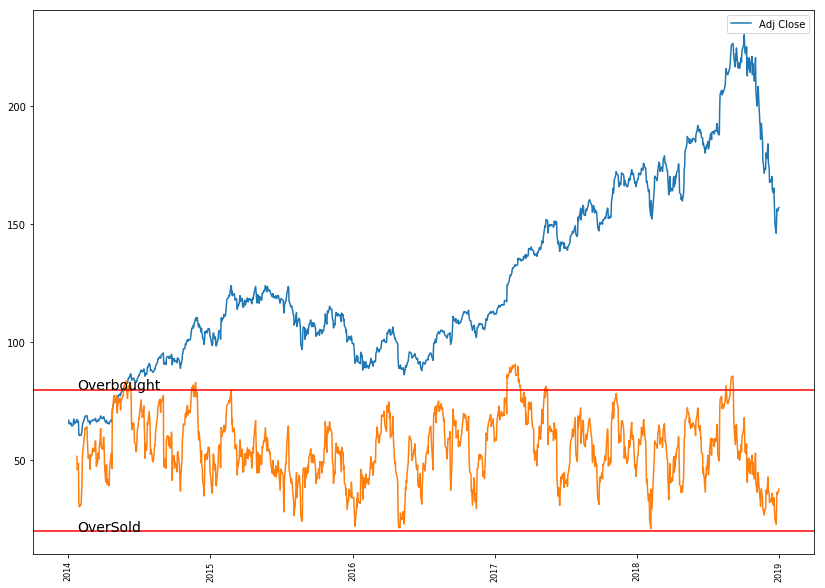

In [7]:
fig, ax = plt.subplots(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.plot(rsi)
ax.axhline(y=80,color='r')
ax.axhline(y=20,color='r')
plt.text(s='Overbought', x=rsi.index[0], y=80, fontsize=14)
plt.text(s='OverSold', x=rsi.index[0], y=20, fontsize=14)
plt.legend()
p = plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=8)

## MACD (Moving Average Convergence Divergence)

MACD is an oscillating indicator and it has trend-following and momentum indicator.

In [8]:
macd, macdsignal, macdhist = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
macd = macd.dropna()
macd

Date
2014-02-20     0.529592
2014-02-21     0.461335
2014-02-24     0.425779
2014-02-25     0.337745
2014-02-26     0.217458
2014-02-27     0.224737
2014-02-28     0.213467
2014-03-03     0.217524
2014-03-04     0.253291
2014-03-05     0.289714
2014-03-06     0.298726
2014-03-07     0.299256
2014-03-10     0.301099
2014-03-11     0.351211
2014-03-12     0.391709
2014-03-13     0.358915
2014-03-14     0.269070
2014-03-17     0.216272
2014-03-18     0.219401
2014-03-19     0.217943
2014-03-20     0.188518
2014-03-21     0.205336
2014-03-24     0.279864
2014-03-25     0.393512
2014-03-26     0.425565
2014-03-27     0.422449
2014-03-28     0.409149
2014-03-31     0.392855
2014-04-01     0.425092
2014-04-02     0.454574
                ...    
2018-11-15    -6.982479
2018-11-16    -7.037845
2018-11-19    -7.610258
2018-11-20    -8.677356
2018-11-21    -9.430399
2018-11-23   -10.269569
2018-11-26   -10.624930
2018-11-27   -10.812449
2018-11-28   -10.303957
2018-11-29    -9.898550
2018-11-30 

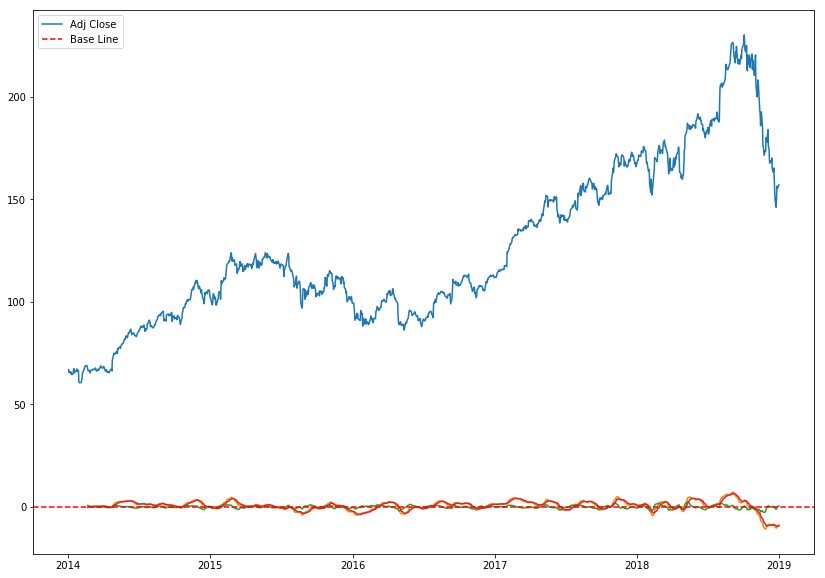

In [9]:
fig, ax = plt.subplots(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.plot(macd)
plt.plot(macdhist.dropna())
plt.plot(macdsignal.dropna())
ax.axhline(y=0,color='r', label='Base Line', linestyle='--')
plt.legend()
plt.show()

## On-Balance Volume (OBV) 

OBV is a valuable indicator that uses volumen information to created single line indicator. On the other hand, the indicator is a measurement of cumulative buying and selling pressure by adding the bolume on up days and minus volume on down days. 

In [10]:
obv = ta.OBV(df['Adj Close'], df['Volume'])
obv

Date
2014-01-02    5.867120e+07
2014-01-03   -3.944570e+07
2014-01-06    6.370700e+07
2014-01-07   -1.559530e+07
2014-01-08    4.903710e+07
2014-01-09   -2.075010e+07
2014-01-10   -9.699410e+07
2014-01-13   -2.370900e+06
2014-01-14    8.076950e+07
2014-01-15    1.786792e+08
2014-01-16    1.213597e+08
2014-01-17    1.467480e+07
2014-01-21    9.680650e+07
2014-01-22    1.918028e+08
2014-01-23    2.926126e+08
2014-01-24    1.852739e+08
2014-01-27    3.239936e+08
2014-01-28    5.761280e+07
2014-01-29   -6.808970e+07
2014-01-30   -2.377151e+08
2014-01-31   -1.215158e+08
2014-02-03   -2.114980e+07
2014-02-04    7.302050e+07
2014-02-05    1.551067e+08
2014-02-06    2.195480e+08
2014-02-07    3.121181e+08
2014-02-10    3.985079e+08
2014-02-11    4.690721e+08
2014-02-12    3.920469e+08
2014-02-13    4.688964e+08
                  ...     
2018-11-15    1.549442e+09
2018-11-16    1.586370e+09
2018-11-19    1.544445e+09
2018-11-20    1.476619e+09
2018-11-21    1.445495e+09
2018-11-23    1.421871e

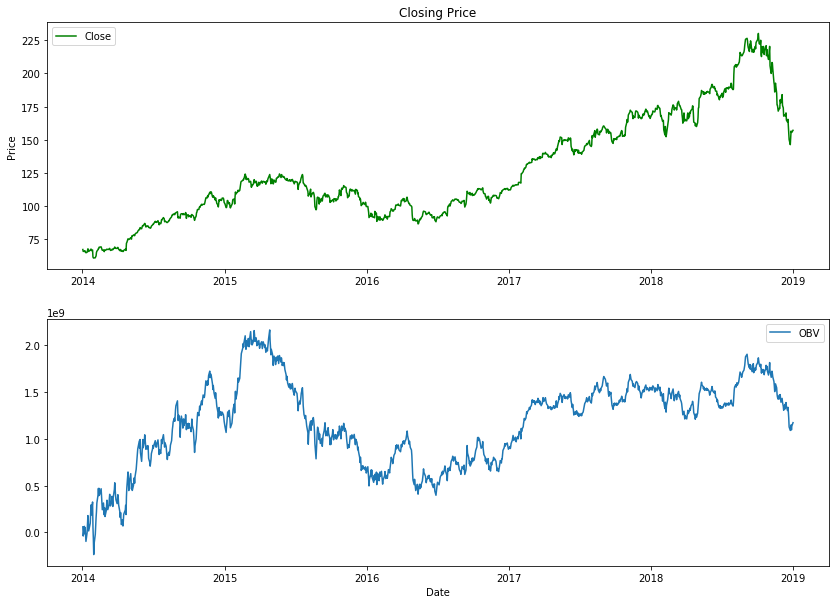

In [11]:
plt.subplots(figsize=(14,10))
plt.subplot(2, 1, 1)
plt.plot(df['Adj Close'], color ='g', label='Close')
plt.title('Closing Price')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(obv, '-', label='OBV')
plt.xlabel('Date')
plt.legend()

plt.show()